# The case study: "No maximum at the R2-curve"
## Author 
 Olga Krasotkina for MPI

## Problem statement
In some cases the PR2 curve is monotonic and has not any extremum and sugessts very large  optimal smoothness tending to the full stationary betas. 

## Source data

There are 12 indicies an 158 funds for 60 time points from 2015-03-29 till 2015-06-12. 


## Research steps

* Done Python workspace for non-stationaty regression and cross-validation analysis. At this stage I use the non-stationaty regression estimation procedure without any constraints and **leave-one-out** algorithm as cross-validation. I would like to make research step-by-step from basic to complicated model


## Conclusion



* The return of  I2 index at the 2015-03-25 has oulier.
* .....
* ....



## Extended studies
### Step 1. Import packages


In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import Regress as nsr
import math
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib notebook

### Step 2. Import data



In [2]:
fund_data = pd.read_excel('SmoothnessData.xlsx','Sheet1')
assets_data = pd.read_excel('SmoothnessData.xlsx','Sheet2')
#assets_data

In [3]:
fundstbl = fund_data.iloc[2:62,0:158].values
assetstbl = assets_data.iloc[2:62,0:12].values
dates = assets_data.iloc[2:62].index.date
assetsall = np.mat(assetstbl)
fundsall = np.mat(fundstbl)
n = np.size(assetsall,1)
T = np.size(assetsall,0)
print(n)
print(T)

12
60


### Step 3. A look at the returns


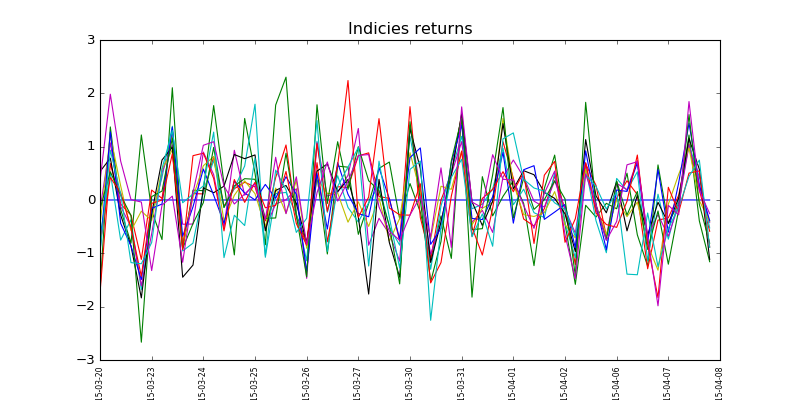

In [5]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)






time =  range(T)
plt.figure(1, figsize=(10,5)) 
plt.title('Indicies returns')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)


ax.get_xaxis().set_major_locator(majorLocator)

#plt.subplot(3,1,1)
for i in range(0,n):
    plt.plot(time, assetsall[:,i])
plt.show()

### Step 1.1 Factor analysis

In [45]:
assetss  = assetsall[:,np.array([1,2,3,4,5,6,7,8,9,10,11])] 

XXT = np.dot(assetss.T,assetss)
#print(XXT)
eigvals = np.linalg.eigvals(XXT.astype("float64"))
print eigvals

[ 231.70292839   43.1197528    26.1850778    22.82584839   16.20726111
   12.07312984    2.91257297    7.35793332    5.93053777    5.27345553
    4.19706855]


### Set parameters

In [34]:
# set smoothness
lam = 1000

# fund
fnum = 0

# indicies
index_array = np.arange(12)
index_array = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
index_array = np.array([10,11])
print(index_array)
# set model matrix
dynamic_model = 0

[10 11]


### Step 3. Example of an non-stationary regression


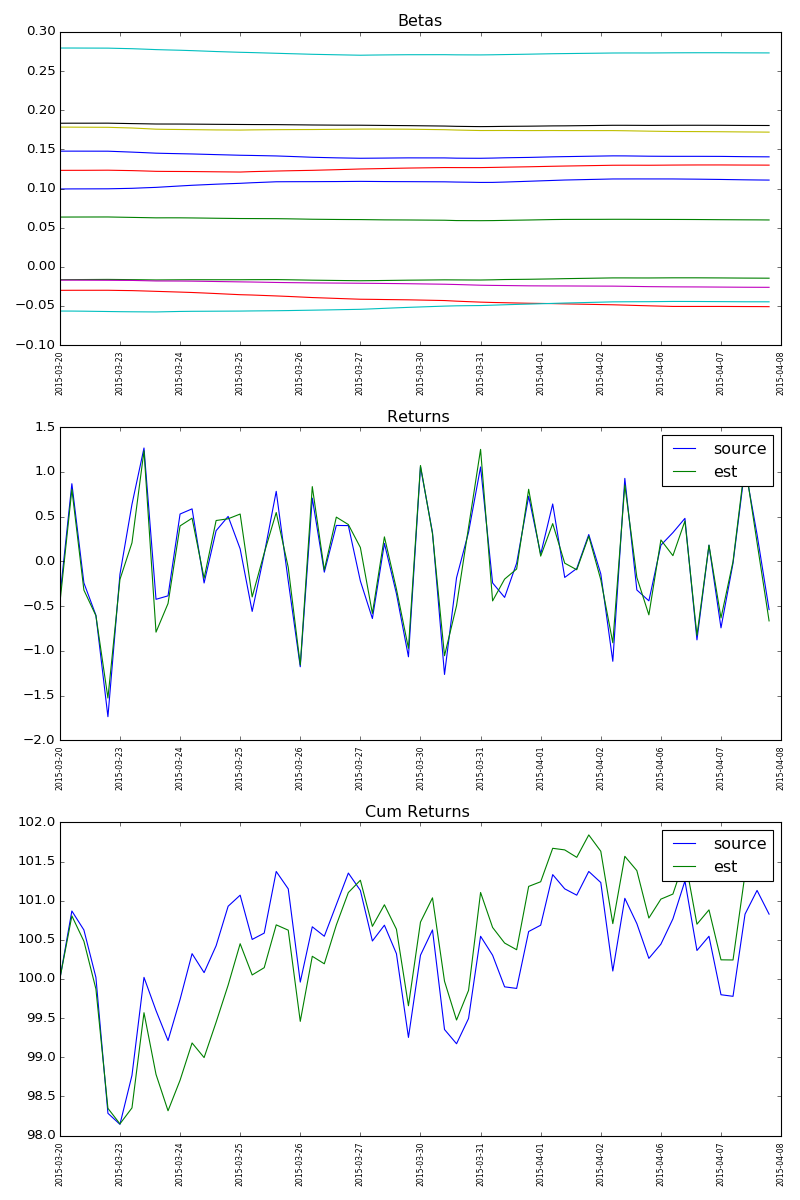

In [30]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)


time =  range(T)
outPoint = np.zeros([T,1])
fund = fundsall[:,fnum]
assets = assetsall[:,index_array]
n = np.size(assets,1)
T = np.size(assets,0)

beta, fund_est = nsr.nonstatRegress(assets, fund, lam, outPoint,dynamic_model)
cumfund = nsr.CumReturn(fund)
cumfund_est = nsr.CumReturn(fund_est)



time =  range(T)
plt.figure(2,figsize=(10,15))
plt.subplot(3,1,1)
plt.title('Betas')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
#plt.subplot(3,1,2)
for i in range(1,n):
    plt.plot(time, beta[:,i])

plt.show()
# Plot  return
plt.subplot(3,1,2)
plt.title('Returns ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
plt.plot(time, fund, label='source' )
plt.plot(time, fund_est, label='est')
plt.tight_layout() 
plt.legend()
plt.show()
# Plot cumulative return
plt.subplot(3,1,3)
plt.title('Cum Returns ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
plt.plot(time, cumfund, label='source' )
plt.plot(time, cumfund_est, label='est')
plt.tight_layout() 
plt.legend()
plt.show()

### Step 4. Example of cross-validation procedure for fixed smoothness value

0.0555128804083



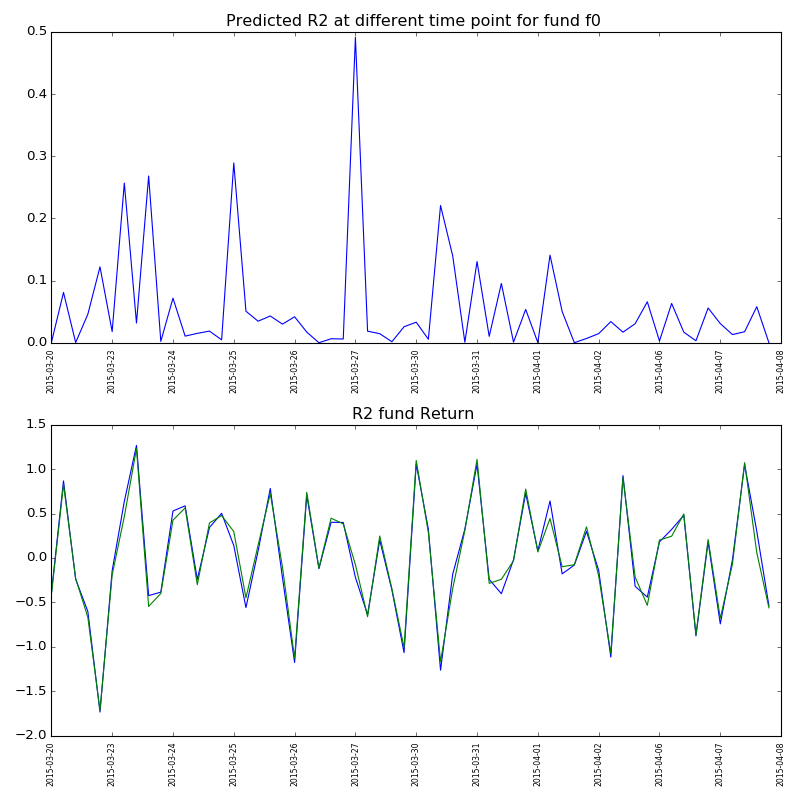

In [8]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)


# Cross-validation (Leave-one_out procedure)
fund = fundsall[:,fnum]
assets = assetsall[:,index_array]
n = np.size(assets,1)
T = np.size(assets,0)
arrR2, r2, fund_out = nsr.LeaveOneOut(assets,fund,lam,dynamic_model)
cumfund = nsr.CumReturn(fund)
cumfund_out = nsr.CumReturn(fund_out)
print r2    
# Plot PR2
time =  range(T)
plt.figure(3,figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Predicted R2 at different time point for fund f0 ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
plt.plot(time, arrR2)
plt.show()
# Plot cumulative return
plt.subplot(2,1,2)
plt.title('R2 fund Return ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
plt.plot(time, fund)
plt.plot(time, fund_out)
plt.tight_layout() 

plt.show()

### Step 5. Example of cross-validation procedure for fixed smoothness value for all funds 


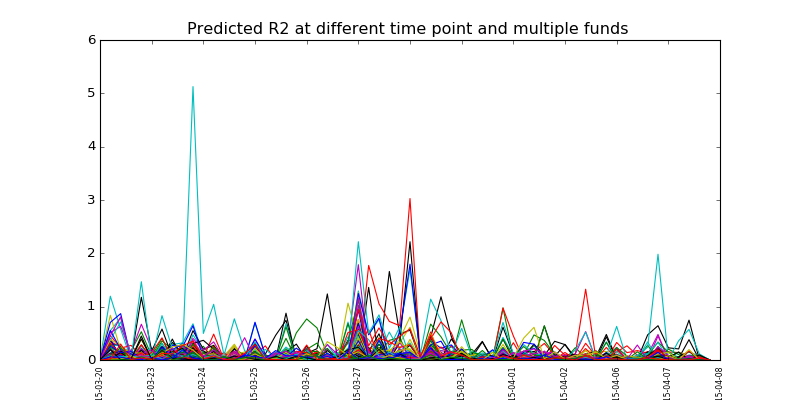

In [9]:
# Cross-validation (Leave-one_out procedure)

assets = assetsall[:,index_array]
n = np.size(assets,1)
T = np.size(assets,0)
# Plot PR2
time =  range(T)

plt.figure(4,figsize=(10,5)) 

plt.title('Predicted R2 at different time point and multiple funds ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
for i in range(157):
    arrR2, r2, fund_out = nsr.LeaveOneOut(assets,fundsall[:,i],lam,dynamic_model)
    plt.plot(time, arrR2)
   
plt.show()

### Step 6. LOO procedure  for smoothness adjustment


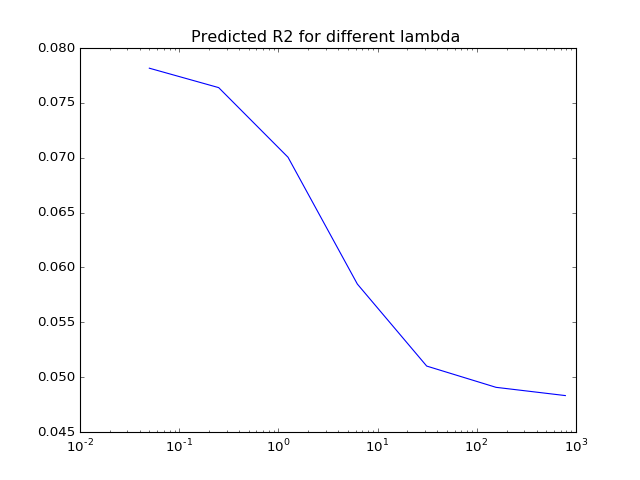

In [10]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)


fund = fundsall[:,fnum]
assets = assetsall[:,index_array]
lam_arr = []
lam = 0.01
while lam <=500:
    lam = lam*5
    lam_arr.append(lam)


r2_lam_arr = []
arr = []
for lam in lam_arr:
     arr, r2_lam, fund_out = nsr.LeaveOneOut(assets,fund,lam,dynamic_model)
     r2_lam_arr.append(r2_lam)
#print  r2_lam_arr   
plt.figure(5)
plt.title('Predicted R2 for different lambda ')
ax = plt.gca()
ax.set_xscale('log')
plt.plot(lam_arr,r2_lam_arr)

### Step 7. Akaike information criterion  for smoothness adjustment with known observation variance 


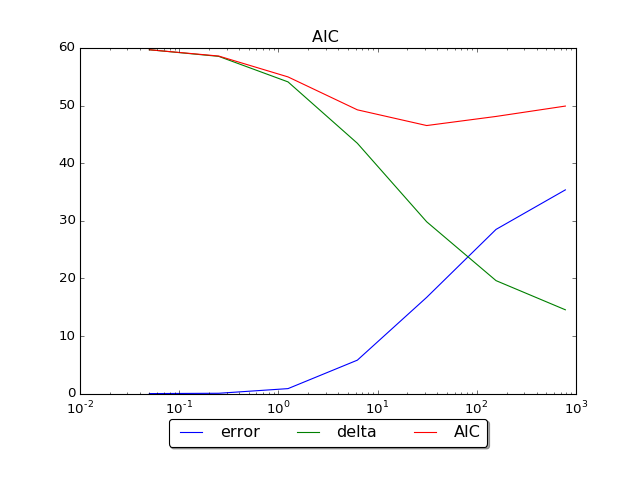

In [32]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)


fund = fundsall[:,fnum]
assets = assetsall[:,index_array]
lam_arr = []
lam = 0.01
while lam <=500:
    lam = lam*5
    lam_arr.append(lam)


r2_lam_arr = []
tr_lam_arr = []
arr = []
for lam in lam_arr:
     r2_lam, trace_lam = nsr.AIC(assets,fund,lam,dynamic_model)
     r2_lam_arr.append(r2_lam)
     tr_lam_arr.append(trace_lam)
#print  r2_lam_arr   
plt.figure(6)
plt.title('AIC ')
ax = plt.gca()
ax.set_xscale('log')
new_r2_lam_arr = [x *1500 for x in r2_lam_arr]
aic = [x +y  for x, y in zip(new_r2_lam_arr,tr_lam_arr)]
plt.plot(lam_arr,new_r2_lam_arr, label='error')
plt.plot(lam_arr,tr_lam_arr, label='delta')
plt.plot(lam_arr,aic, label='AIC')
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)

###  Step 7. Implicit cross-validation crieterion with unknown observation variance


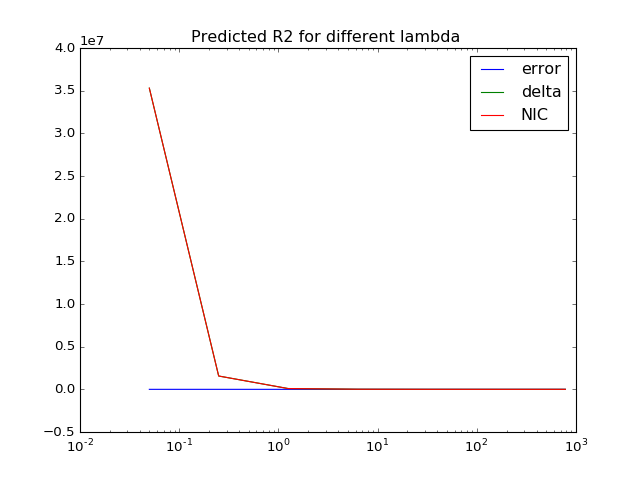

In [33]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)


fund = fundsall[:,fnum]
assets = assetsall[:,index_array]
n = np.size(assets,1)
T = np.size(assets,0)
lam_arr = []
lam = 0.01
while lam <=500:
    lam = lam*5
    lam_arr.append(lam)


r2_lam_arr = []
tr_lam_arr = []
arr = []
for lam in lam_arr:
     r2_lam, trace_lam = nsr.AIC(assets,fund,lam,dynamic_model)
     ln_r2  = T*math.log(r2_lam)/2   
     r2_lam_arr.append(ln_r2)
     sig_trace_lam  =   1/r2_lam* trace_lam 
     tr_lam_arr.append(sig_trace_lam)
     
#print  r2_lam_arr
plt.figure(7)
plt.title('Predicted R2 for different lambda ')
ax = plt.gca()
ax.set_xscale('log')
#import ipdb; ipdb.set_trace()
new_r2_lam_arr = [x  for x in r2_lam_arr]
aic = [x +y  for x, y in zip(new_r2_lam_arr,tr_lam_arr)]
plt.plot(lam_arr,new_r2_lam_arr, label='error')
plt.plot(lam_arr,tr_lam_arr, label='delta')

#aic = np.sum(r2_lam_arr+tr_lam_arr)
plt.plot(lam_arr,aic, label='NIC')
plt.legend()